## Proyecto

In [22]:
import seaborn as sb
import sklearn as sc
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



carga de datos a memoria

In [23]:
data = np.load('proyecto_training_data.npy')

segmentacion de datos

In [24]:
largo = len(data)
tlargo = int(largo *0.8)

datatrain = np.nan_to_num(data[:tlargo])
datatest = data[tlargo:]
cols = ['SalePrice','OverallQual','FstFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']

In [25]:
dt = pd.DataFrame(datatrain,columns=cols)

In [164]:
dt

,SalePrice,OverallQual,FstFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,0.0
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


In [27]:
def estadistica_desc(val,nombre):
    print('Estadistica de ' + nombre)
    print('  Media: ', np.mean(val[nombre]))
    print('  Maximo', np.max(val[nombre]))
    print('  Minimo', np.min(val[nombre]))
    print('  Rango', np.ptp(val[nombre],axis=0)) # rango entre minimo y maximo
    print('  Desv St', np.std(val[nombre]))

estadistica_desc(dt,'SalePrice')
estadistica_desc(dt,'OverallQual')
estadistica_desc(dt,'FstFlrSF')
estadistica_desc(dt,'TotRmsAbvGrd')
estadistica_desc(dt,'YearBuilt')
estadistica_desc(dt,'LotFrontage')


Estadistica de SalePrice
  Media:  180590.27739726027
  Maximo 755000.0
  Minimo 34900.0
  Rango 720100.0
  Desv St 78781.95108033359
Estadistica de OverallQual
  Media:  6.101027397260274
  Maximo 10.0
  Minimo 1.0
  Rango 9.0
  Desv St 1.3774351932407467
Estadistica de FstFlrSF
  Media:  1156.3236301369864
  Maximo 3228.0
  Minimo 334.0
  Rango 2894.0
  Desv St 373.6203315035858
Estadistica de TotRmsAbvGrd
  Media:  6.4854452054794525
  Maximo 14.0
  Minimo 2.0
  Rango 12.0
  Desv St 1.6084517167387353
Estadistica de YearBuilt
  Media:  1971.451198630137
  Maximo 2010.0
  Minimo 1875.0
  Rango 135.0
  Desv St 29.9388820686777
Estadistica de LotFrontage
  Media:  57.61044520547945
  Maximo 313.0
  Minimo 0.0
  Rango 313.0
  Desv St 34.121054548481034


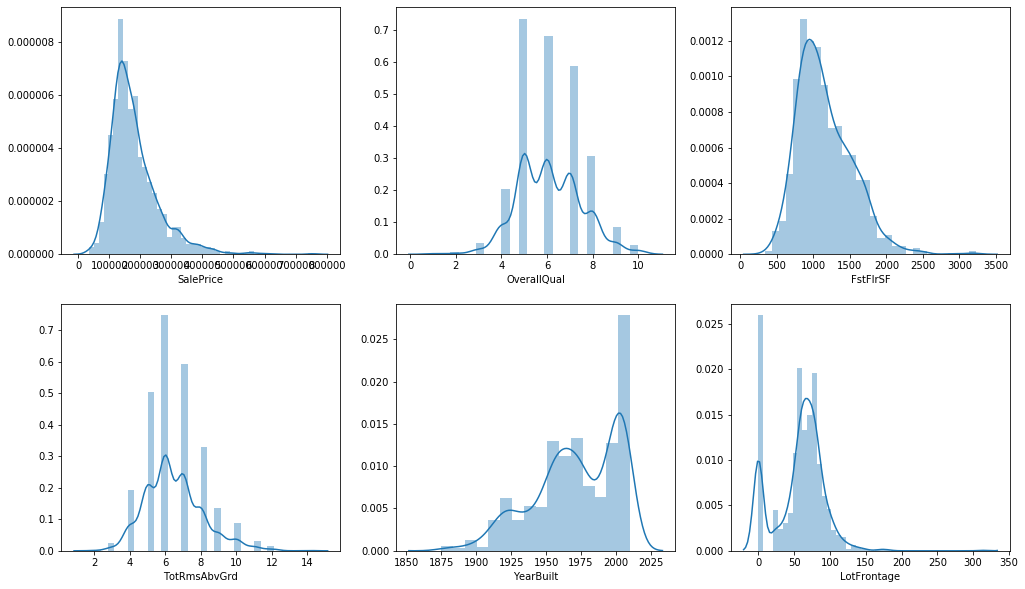

In [28]:
f, axes = plt.subplots(2, 3, figsize=(17, 10))
sb.distplot( dt["SalePrice"] , ax=axes[0, 0])
sb.distplot( dt["OverallQual"] , ax=axes[0, 1])
sb.distplot( dt["FstFlrSF"] , ax=axes[0, 2])
sb.distplot( dt["TotRmsAbvGrd"] , ax=axes[1, 0])
sb.distplot( dt["YearBuilt"] , ax=axes[1, 1])
sb.distplot( dt["LotFrontage"] , ax=axes[1, 2])



In [29]:
#ax0 = sb.distplot(dt['SalePrice'])
#ax1 = sb.distplot(dt['OverallQual'])
#ax2 = sb.distplot(dt['FstFlrSF'])
#ax3 = sb.distplot(dt['TotRmsAbvGrd'])
#ax4 = sb.distplot(dt['YearBuilt'])
#ax5 = sb.distplot(dt['LotFrontage'])


In [31]:
#ax = sb.scatterplot(x="OverallQual", y="SalePrice", data=dt)
#ax = sb.scatterplot(x="FstFlrSF", y="SalePrice", data=dt)
#plt.figure()
#plt.scatter(dt['OverallQual'],dt['SalePrice'])
#plt.title('hola')
#plt.show()

In [32]:
cof_mat = np.corrcoef([dt[cols[1]],dt[cols[2]],dt[cols[3]],dt[cols[4]],dt[cols[5]],dt[cols[0]]])
coef = cof_mat[5:][0]
#np.corrcoef([dt[cols[2]],dt[cols[0]]])
#np.corrcoef([1,2,3],[3,3,5])
coef[0]

0.7939900504626405

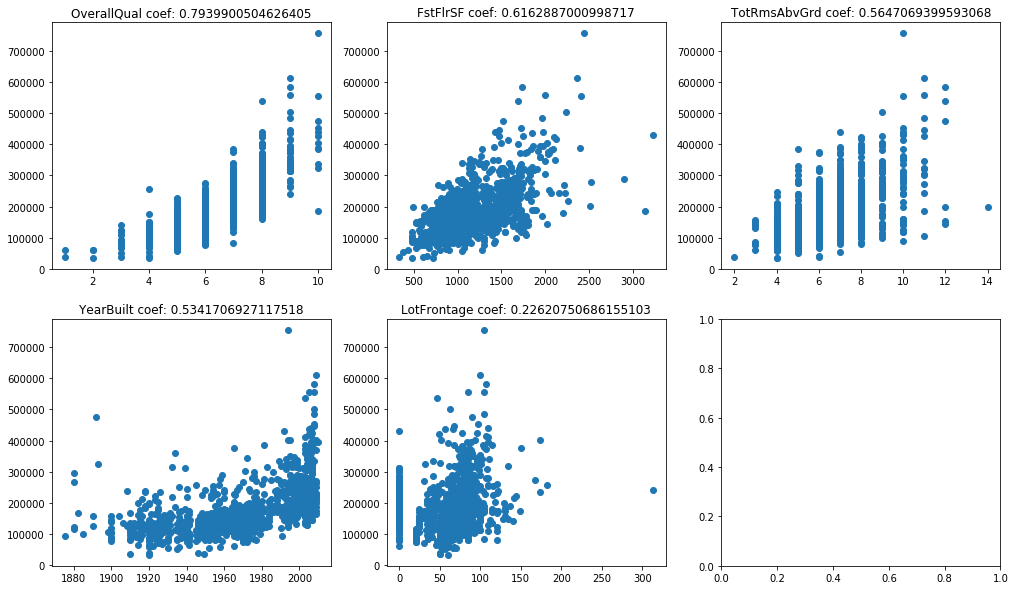

In [33]:
fig, axs = plt.subplots(2, 3, figsize=(17, 10))
axs[0, 0].scatter(dt[cols[1]],dt[cols[0]])
axs[0, 0].set_title(cols[1] + " coef: " + str(coef[0]))
axs[0, 1].scatter(dt[cols[2]],dt[cols[0]])
axs[0, 1].set_title(cols[2] + " coef: " + str(coef[1]))
axs[0, 2].scatter(dt[cols[3]],dt[cols[0]])
axs[0, 2].set_title(cols[3] + " coef: " + str(coef[2]))
axs[1, 0].scatter(dt[cols[4]],dt[cols[0]])
axs[1, 0].set_title(cols[4] + " coef: " + str(coef[3]))
axs[1, 1].scatter(dt[cols[5]],dt[cols[0]])
axs[1, 1].set_title(cols[5] + " coef: " + str(coef[4]))

plt.show()

#### Seleccion de variables

Variables con mayor correlacion:
    
    OverallQual
    FstFlrSF

#### Funcion de regrecion lineal

In [210]:
def sigmoid(x): #convertir los valores de x al rango de 0 a 1
    
    return 1/(1+np.exp(-x))

In [180]:
def lineal_reg(x,y,epochs,imprimir_error_cada=0,lr=0.1):
    
    parametros = np.array([100,0.1])
    error = np.zeros(epochs)
    modelo = {}
    #print(x)
    nc = np.ones_like(x)  # lista de unos
    #print(nc)
    
    # conversion de filas a columnas y concatenacion horizontal
    nh = np.hstack((np.expand_dims(x,1),np.expand_dims(nc,1))) 
    #print(nh, nh.shape)
    #print(parametros.shape)
    #print(nh[0][2])
    
    for i in range(epochs):
        modelo[i] = parametros
        yhat = np.matmul(nh,parametros)
        dify = yhat - y
        
        error[i] = 1/2 * np.average(np.power(dify,2))
        
        if (i+1)%imprimir_error_cada == 0:
            print(i+1,'Error actual: ', error[i])
        #print(yhat*x)
        #grad_m = np.average((yhat - y) * x)
        #grad_b = np.average(yhat - y)
        #print(grad_m)
        #print(grad_b)
        #print(dify.shape, nh.shape)
        #print(dify)
        #print( nh)
        grad = np.matmul(dify, nh)/dify.shape[0]
        #print(grad)
        parametros = [parametros[0] - lr*grad[0], parametros[1]-lr*grad[1]]
        #print(parametros)
    #print(error)
    return modelo,error

test = lineal_reg([1,3,5],[10,20,30],15,3,0.1)
#print(resultado[0])
#print(resultado[1])


3 Error actual:  266.65312757201644
6 Error actual:  71.63011883326352
9 Error actual:  62.870019801520165
12 Error actual:  55.2122860106982
15 Error actual:  48.48729109700451


In [339]:
y_reg =  sigmoid(dt[cols[0]]) #dt[cols[0]]/1000
#y_reg = dt[cols[0]] #/1000
x1_reg = sigmoid(dt[cols[1]])
x2_reg = sigmoid(dt[cols[2]]) #dt[cols[2]]/1000
#print(y_reg)
#print(dt[cols[1]])
#print(dt[cols[2]])

#resultado1 = lineal_reg(dt[cols[1]],y_reg,25,5,0.1)
#resultado2 = lineal_reg(dt[cols[2]],y_reg,75,5,0.05)

resultado1 = lineal_reg(x1_reg,y_reg,75,5,0.05)
resultado2 = lineal_reg(x2_reg,y_reg,75,5,0.05)

#print(resultado[0])
#print(resultado[1])


5 Error actual:  2101.1619623571632
10 Error actual:  737.1994358011518
15 Error actual:  258.75618287412505
20 Error actual:  90.93049183765272
25 Error actual:  32.06151425549672
30 Error actual:  11.41177107397583
35 Error actual:  4.168359929187523
40 Error actual:  1.6275479208779549
45 Error actual:  0.7362876752271226
50 Error actual:  0.42364809018833555
55 Error actual:  0.3139738663497371
60 Error actual:  0.2754947117601936
65 Error actual:  0.2619889709071174
70 Error actual:  0.2572432666575362
75 Error actual:  0.25557036009407713
5 Error actual:  2113.7683403200504
10 Error actual:  737.0254476355609
15 Error actual:  256.9848833955717
20 Error actual:  89.60508827164855
25 Error actual:  31.243362403581234
30 Error actual:  10.893886866359706
35 Error actual:  3.7984634791882046
40 Error actual:  1.324442320700167
45 Error actual:  0.4618044823841572
50 Error actual:  0.1610212665489042
55 Error actual:  0.05614464404319529
60 Error actual:  0.019576426904952062
65 Erro

### Grafica de error

In [278]:
def graph_error(error):
    x = np.linspace(1,len(error),len(error))
    y = error

    plt.plot(x,y)

    plt.xlabel('# Iteracion')
    plt.ylabel('Val Err')
    plt.title('Grafica de error')


    plt.show()

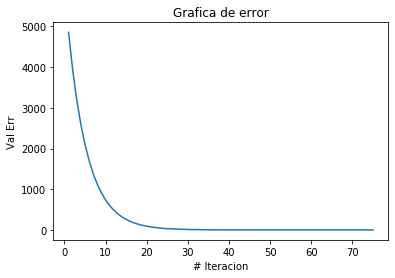

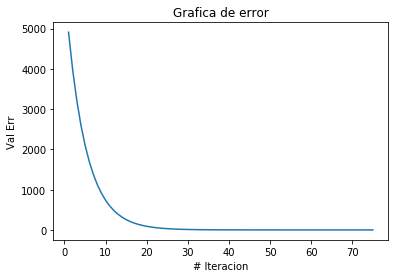

In [340]:
graph_error(resultado1[1])
graph_error(resultado2[1])

### Grafica del modelo

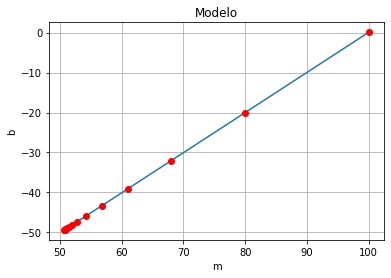

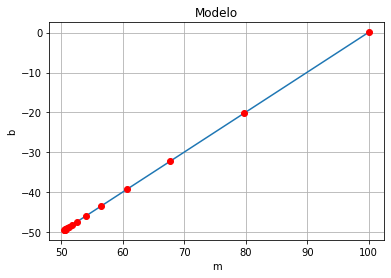

In [342]:
def graph_modelo(modelo,n):
    # se extraen las llaves del dic
    keys = np.array(list(modelo.keys()))
    # se obtienen solo los valoes del dic cada 'n'
    valores = np.array([modelo[i] for i in keys[keys%n==0]])
    
    #Se asigna 
    x = valores[:,0]
    y = valores[:,1]
    #print(x)
    #print(y)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y devolvemos una referencia a la primera grafica
    ax.grid()

    ax.plot(x,y) #
    ax.plot(x,y,'ro')

    ax.set_xlabel('m')
    ax.set_ylabel('b')
    ax.set_title('Modelo')

    plt.show()

graph_modelo(resultado1[0],5)
graph_modelo(resultado2[0],5)

In [326]:
#resultado1[0]
x= {0: [100. ,   0.1],
 1: [95.09821289690515, -4.827700827531492],
 2: [90.68393454255047, -9.265265405846952],
 3: [86.7086771054787, -13.261442898990099],
 4: [83.12877537497852, -16.86013385800632],
 5: [79.90490710113356, -20.100872466094344],
 6: [77.00166104205822, -23.019260819445954]}
keys = np.array(list(x.keys()))
print(keys)
valores = np.array([x[i] for i in keys[keys%2==0]])
#keys[keys%2]
#[keys.get(key) for key in keys]
#keys<4
print(valores)
print(valores[:,1])
#print(type(valores))

[0 1 2 3 4 5 6]
[[100.           0.1       ]
 [ 90.68393454  -9.26526541]
 [ 83.12877537 -16.86013386]
 [ 77.00166104 -23.01926082]]
[  0.1         -9.26526541 -16.86013386 -23.01926082]


In [46]:
x = np.array([1,2,3,8])
unos = np.array([1,1,1,1])
x_mod = np.vstack((x,unos)).T
x_mod.shape
parametros = np.array([100,0.1])
print(x_mod.shape)
print(parametros.shape)
np.matmul(x_mod,parametros)

(4, 2)
(2,)


array([100.1, 200.1, 300.1, 800.1])

In [ ]:
houses = [[1,2104],[1,1416],[1,1534],[1,852]]
hypt = [[-40,200,-150],[0.25,0.1,0.4]]
print(np.matmul(houses,  hypt))

print(np.dot(houses,  hypt))

houses = [[2104,1],[1416,1],[1534,1],[852,1]]
hypt = [[0.25,0.1,0.4],[-40,200,-150]]
print(np.matmul(houses,  hypt))


In [131]:
y1 = np.array([ 1,2,3])
x1 = np.array([[1, 1],
 [2, 1],
 [3, 1]])
print(y1,y1.shape)
print(x1,x1.shape)
r = np.matmul(y1,x1)
print(r)
#x0 = np.array([1,2,3])
#y0 = np.array([1,2,3])
#print(np.matmul(y0,x0))
#print(y0.shape[0])

[1 2 3] (3,)
[[1 1]
 [2 1]
 [3 1]] (3, 2)
[14  6]


In [333]:
dt[cols[0]]/10000

0       20.8500
1       18.1500
2       22.3500
3       14.0000
4       25.0000
         ...   
1163    10.8959
1164    19.4000
1165    23.3170
1166    24.5350
1167    17.3000
Name: SalePrice, Length: 1168, dtype: float64